In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [67]:
start = '2012-01-01'
end = "2022-12-31"
stock = "GOOG"

data = yf.download(stock, start=start, end=end)
data

c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600


In [68]:
data.reset_index(inplace=True)

In [69]:
ma_100_days = data.Close.rolling(100).mean()

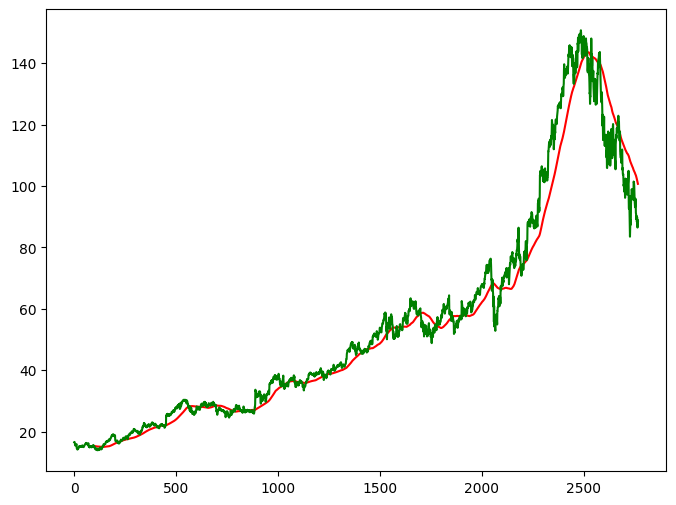

In [70]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(data.Close, "g")
plt.show()

In [71]:
ma_200_days = data.Close.rolling(200).mean()

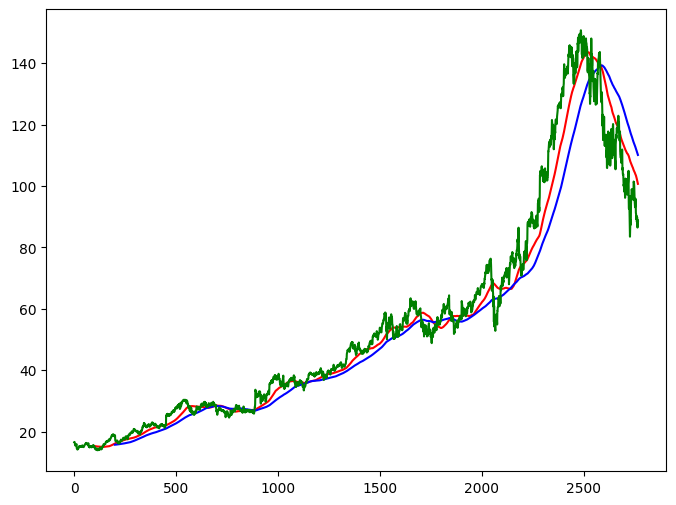

In [72]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(ma_200_days, "b")
plt.plot(data.Close, "g")
plt.show()

In [73]:
data.dropna(inplace=True)

In [74]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [75]:
data_train.shape[0]

2214

In [76]:
data_test.shape[0]

554

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scaled = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []
for i in range(100, data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100:i])
    y.append(data_train_scaled[i,0])

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential